In [463]:
from useful_scit.imps import *
import pprint
import funs

In [100]:
class Dummy:
    def __init__(self):
        pass
path = '/proj/atm/saltena/runs/run_2019_05_15/wrf'
df = funs.get_files_df(path)

In [103]:
_df = df[(df[funs.DOM]==1)&(df[funs.KIND]==funs.wrfrst)]
_df['2018-04-08':'2018-04-09']

,PATH,NAME,DOM,KIND,MONTH
DATE,,,,,
2018-04-08 03:00:00,/proj/atm/saltena/runs/run_2019_05_15/wrf/wrfr...,wrfrst_d01_2018-04-08_03:00:00,1,wrfrst,4
2018-04-08 15:00:00,/proj/atm/saltena/runs/run_2019_05_15/wrf/wrfr...,wrfrst_d01_2018-04-08_15:00:00,1,wrfrst,4
2018-04-09 03:00:00,/proj/atm/saltena/runs/run_2019_05_15/wrf/wrfr...,wrfrst_d01_2018-04-09_03:00:00,1,wrfrst,4
2018-04-09 15:00:00,/proj/atm/saltena/runs/run_2019_05_15/wrf/wrfr...,wrfrst_d01_2018-04-09_15:00:00,1,wrfrst,4


In [105]:
_df = df[(df[funs.DOM]==1)&(df[funs.KIND]==funs.wrfout)]
_df = _df['2018-04-08':'2018-04-09']
_paths = _df[funs.PATH].values

In [107]:
ds = xr.open_mfdataset(_paths)

/homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36backup/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36backup/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


In [413]:
XLAT = 'XLAT'
XLONG = 'XLONG'
try:
    ds[XLAT]= ds[XLAT].mean(TIME)
    ds[XLONG]= ds[XLONG].mean(TIME)
except: pass

In [416]:
# ds

In [419]:
_boo = \
    (ds[XLAT] < -23) &(ds[XLAT] > -24)  & \
    (ds[XLONG]< -61) &(ds[XLONG]> -62)  


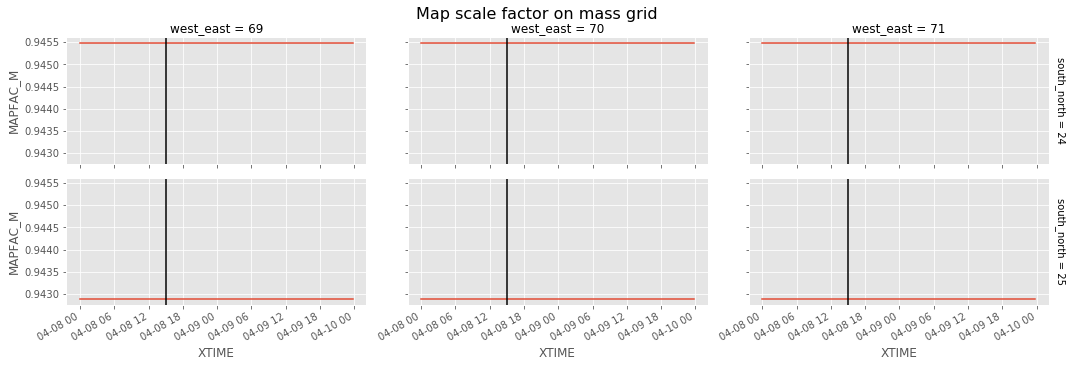

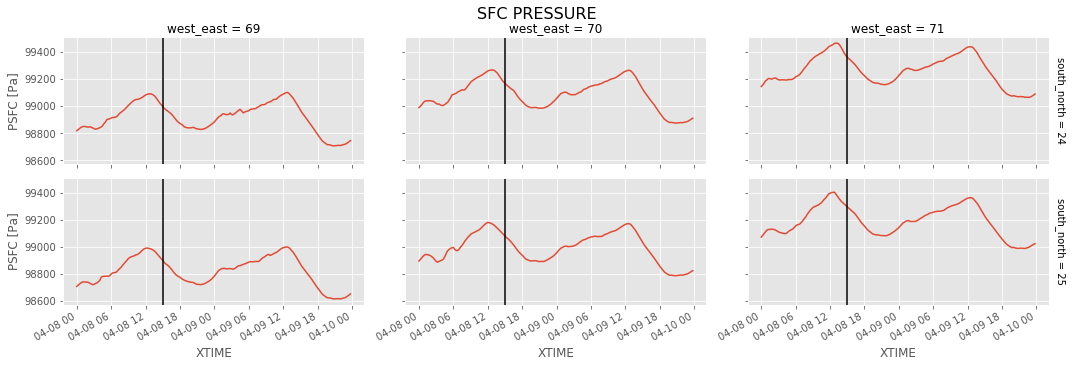

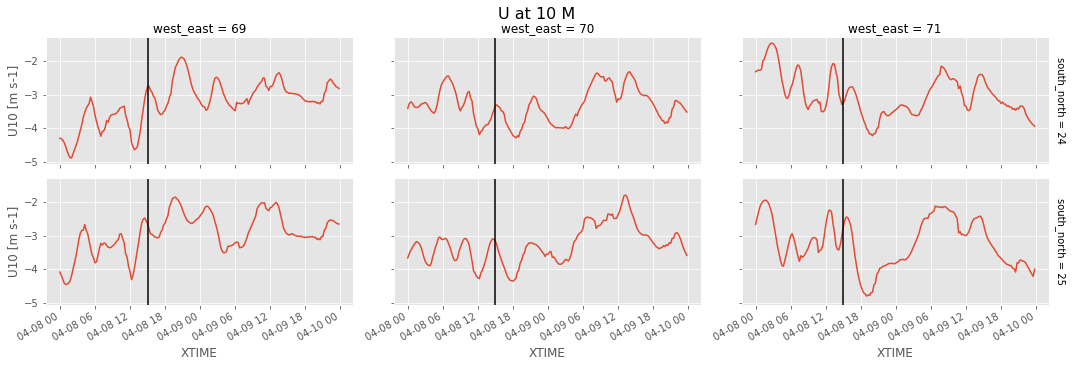

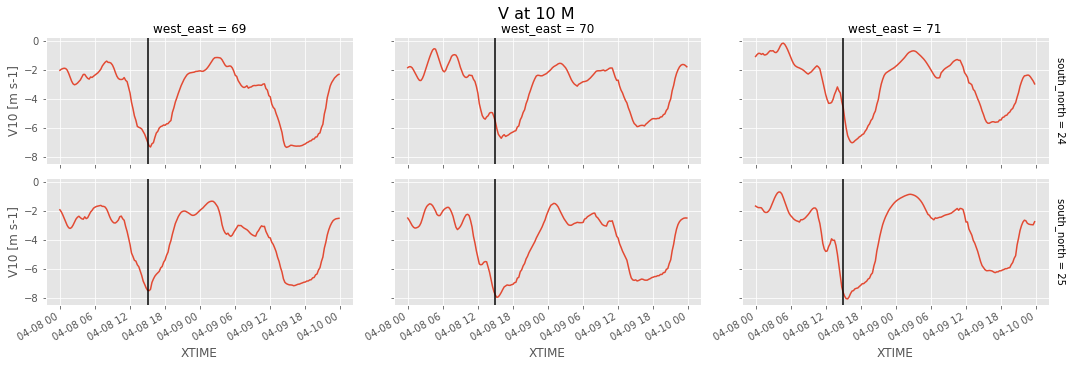

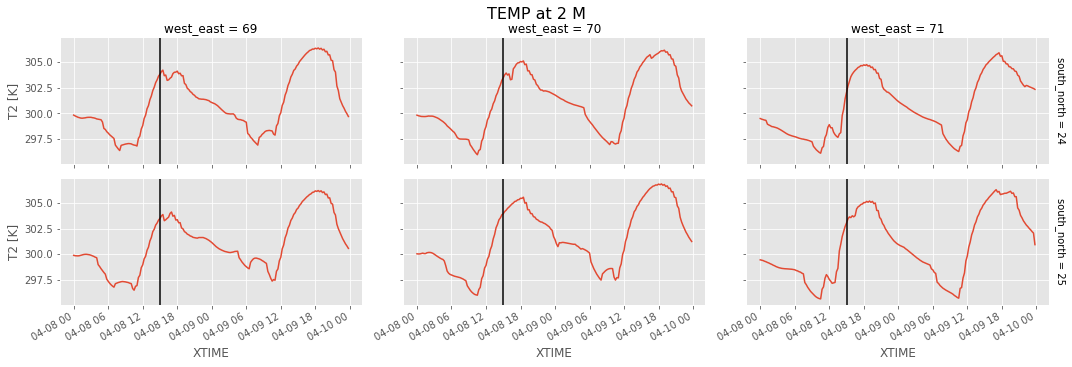

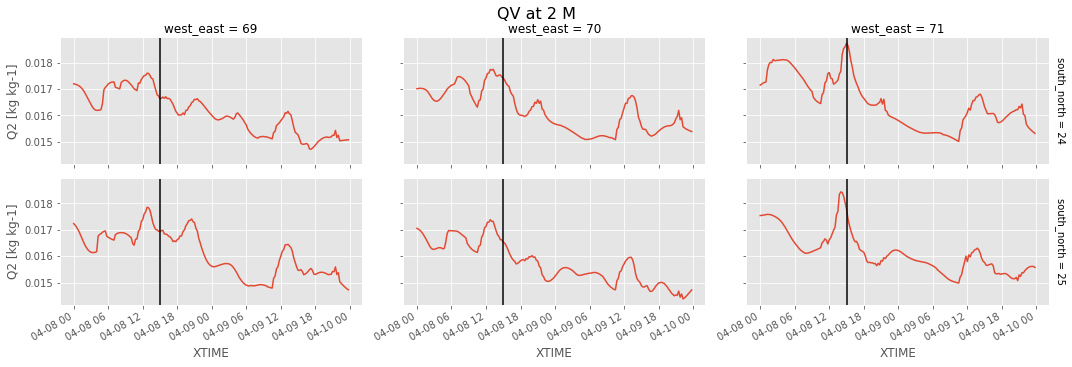

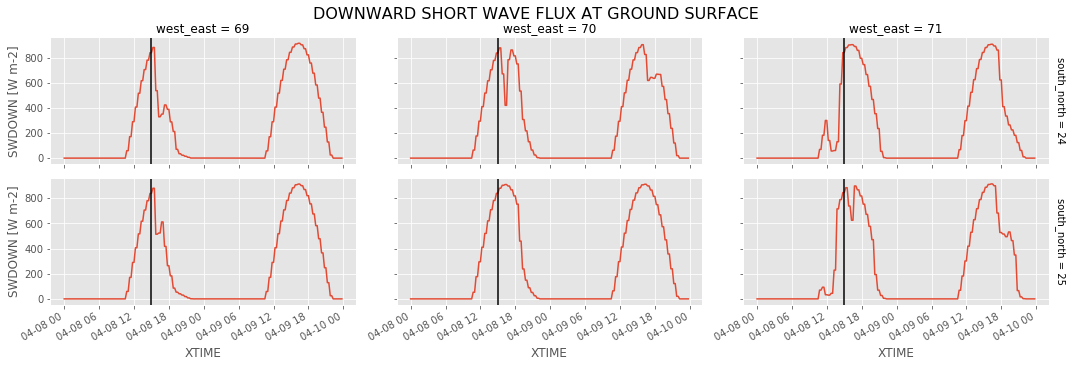

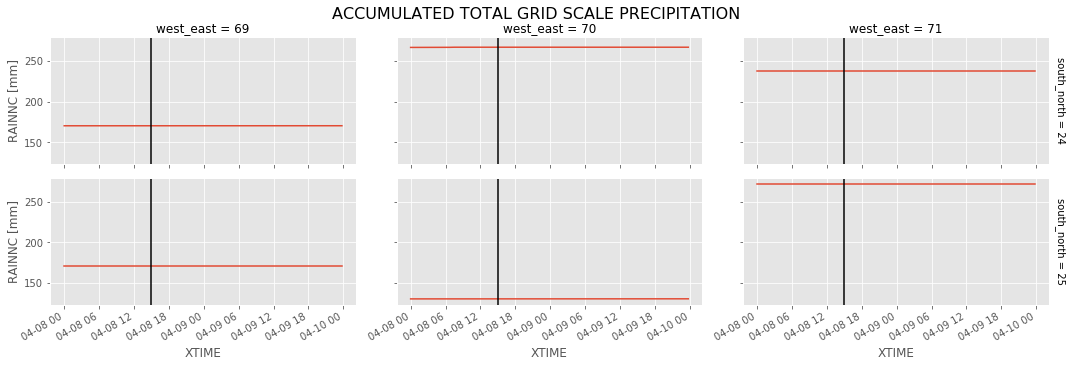

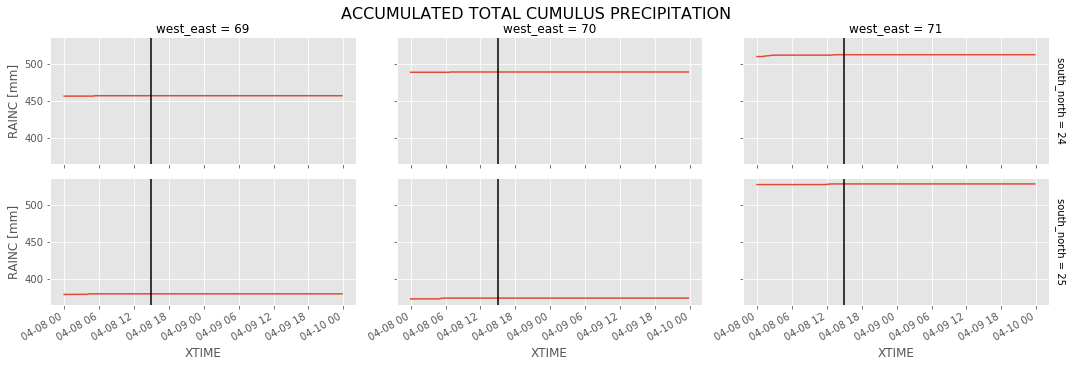

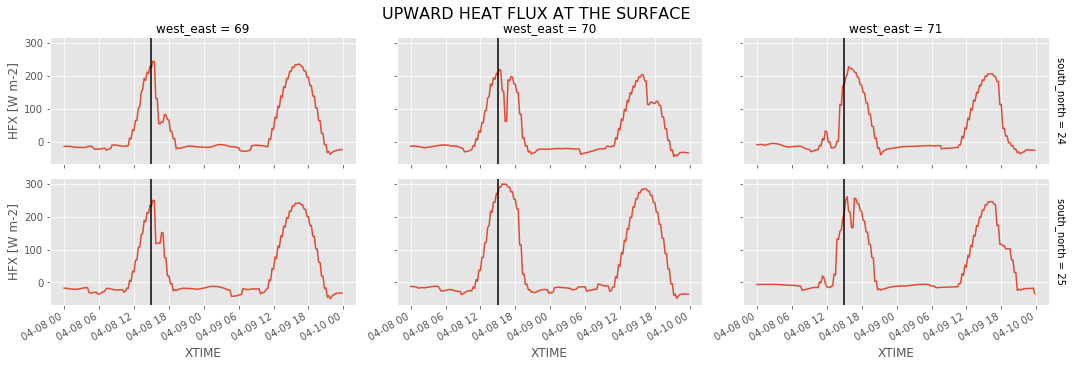

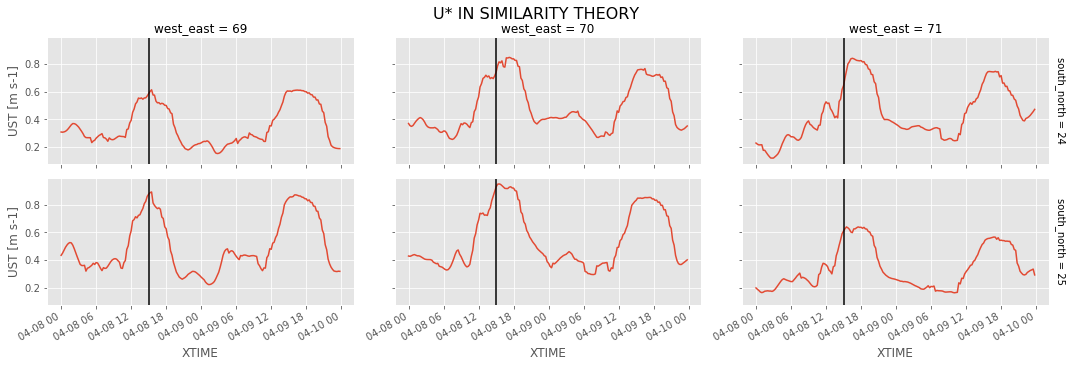

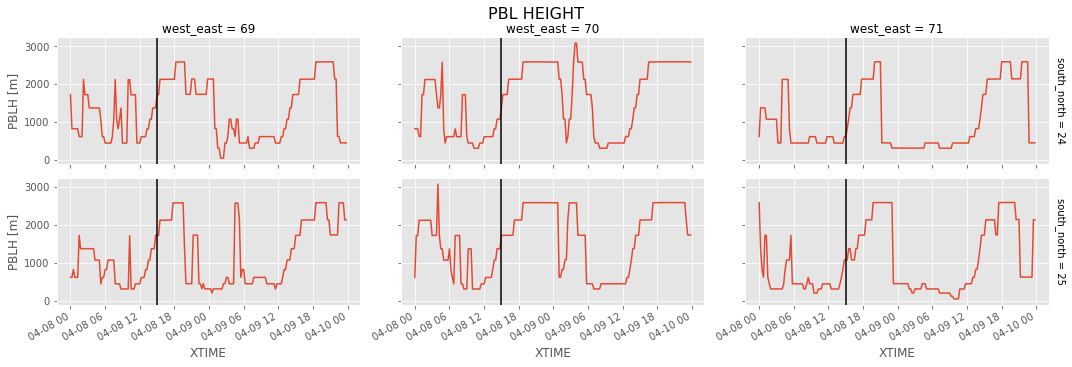

In [479]:
_va = funs.U10

for _va in funs.VARS2D[:]:
#     print(_va)
    _da = ds[_va].where(_boo)
    if funs.TIME in _da.dims:
        _da1=_da.dropna(south_north,how='all').dropna(west_east,how='all')

        _da2 = _da1.swap_dims({funs.TIME:funs.XTIME})

        _fg = _da2.plot.line(col=west_east,row=south_north,figsize=[15,5])
        axs=_fg.axes.flatten()
        for ax in axs:
            ax.axvline(pd.Timestamp('2018-04-08 15'),color='k');
        ax.figure.suptitle(_da2.description,y=1.01,fontsize=16)
        ax.figure.tight_layout()

In [481]:
funs.VARS3D

['PB', 'P', 'PHB', 'PH', 'T', 'QVAPOR', 'TKE']

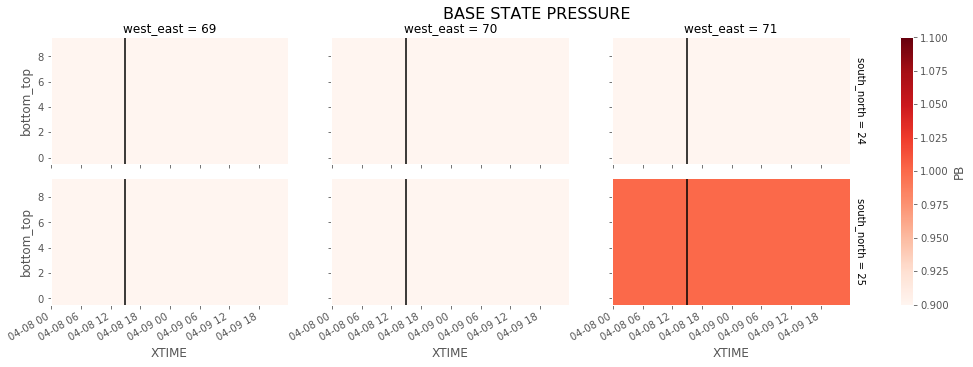

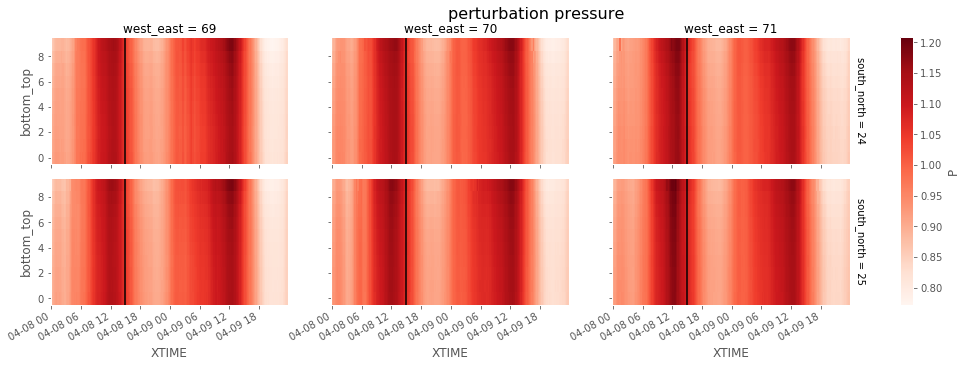

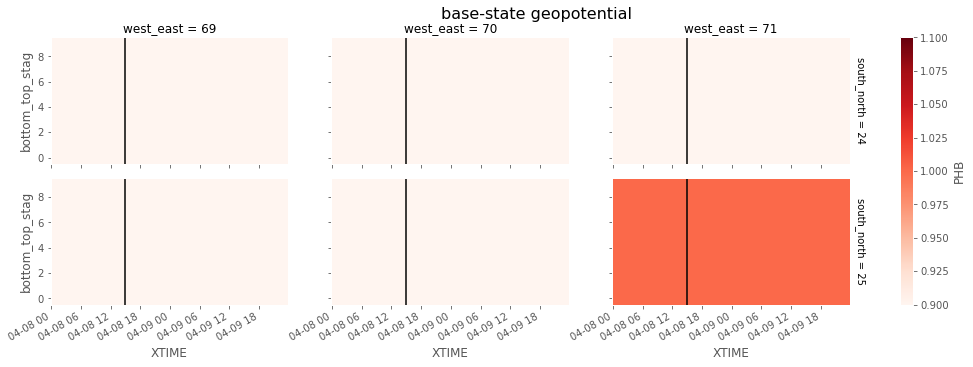

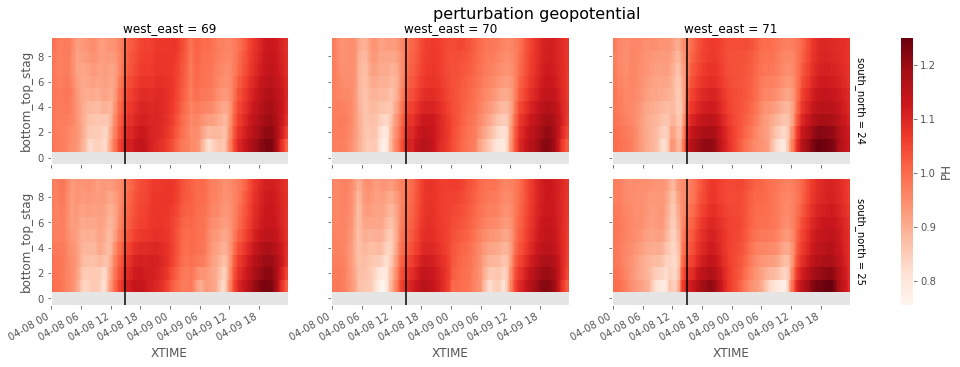

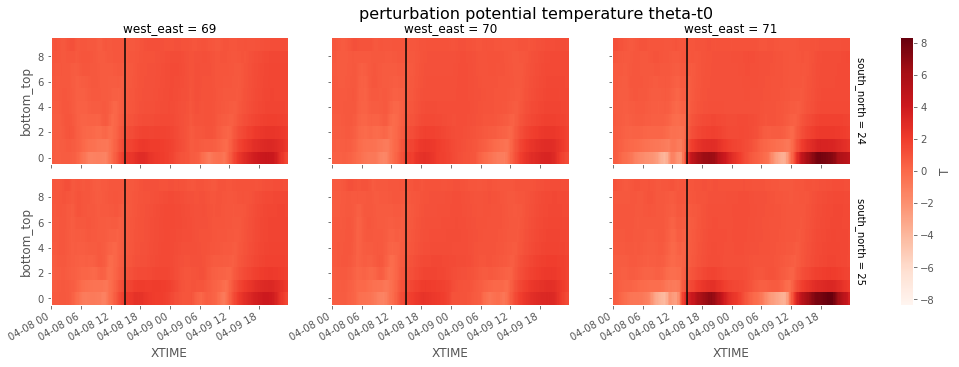

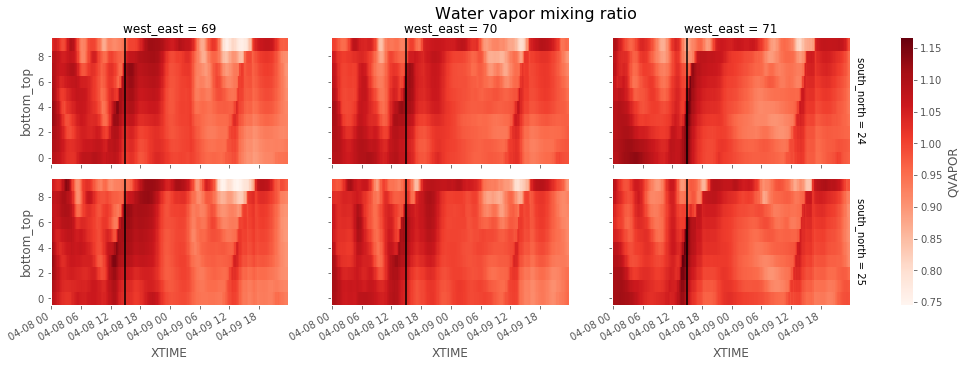

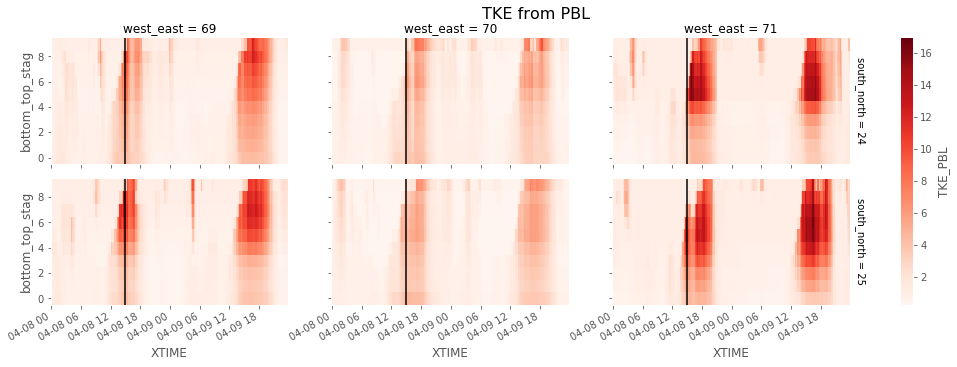

In [514]:
bottom_top = 'bottom_top'
bottom_top_stag = 'bottom_top_stag'
cm = plt.get_cmap('Reds')
for _va in funs.VARS3D[:]:
#     print(_va)
    _da = ds[_va].where(_boo)
    if funs.TIME in _da.dims:
        _da1=_da.dropna(south_north,how='all').dropna(west_east,how='all').load()
        try:_da1 = _da1.isel(**{bottom_top:slice(0,10)})
        except: _da1 = _da1.isel(**{bottom_top_stag:slice(0,10)})

        _da2 = _da1.swap_dims({funs.TIME:funs.XTIME})
        
        _das = _da2.median(funs.XTIME)
        
        _da3:xr.DataArray = _da2/_das


        _fg = _da3.plot(x=funs.XTIME,col=west_east,row=south_north,figsize=[15,5],cmap=cm)
        axs=_fg.axes.flatten()
        for ax in axs:
            ax.axvline(pd.Timestamp('2018-04-08 15'),color='k');
        ax.figure.suptitle(_da2.description,y=1.01,fontsize=16)
#         ax.figure.tight_layout()

ds

In [515]:
ds

<xarray.Dataset>
Dimensions:                (Time: 192, bottom_top: 49, bottom_top_stag: 50, soil_layers_stag: 4, south_north: 85, south_north_stag: 86, west_east: 117, west_east_stag: 118)
Coordinates:
  * south_north            (south_north) int64 0 1 2 3 4 5 ... 79 80 81 82 83 84
  * west_east              (west_east) int64 0 1 2 3 4 5 ... 112 113 114 115 116
    XLAT                   (south_north, west_east) float32 dask.array<shape=(85, 117), chunksize=(85, 117)>
    XLONG                  (south_north, west_east) float32 dask.array<shape=(85, 117), chunksize=(85, 117)>
    XTIME                  (Time) datetime64[ns] dask.array<shape=(192,), chunksize=(4,)>
    XLAT_U                 (Time, south_north, west_east_stag) float32 dask.array<shape=(192, 85, 118), chunksize=(4, 85, 118)>
    XLONG_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(192, 85, 118), chunksize=(4, 85, 118)>
    XLAT_V                 (Time, south_north_stag, west_east) float32 

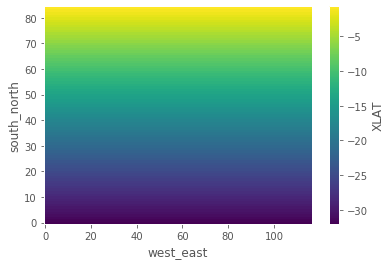

In [383]:
_da[XLAT].plot()

In [375]:
_boo = \
    (_da[XLAT]< -23) &(_da[XLAT]> -24)  & \
    (_da[XLONG]< -61)&(_da[XLONG]> -62) & \


In [376]:
_da1 = _da.where(_boo)

In [377]:
_da2=_da1.dropna(south_north,how='all').dropna(west_east,how='all')

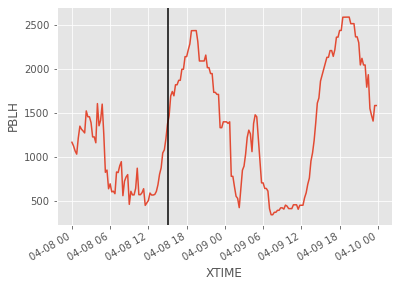

In [408]:
XTIME = 'XTIME'
_ , ax = plt.subplots()
_da2.mean([south_north,west_east]).plot(x=XTIME,ax=ax)
ax.axvline(pd.Timestamp('2018-04-08 15'),color='k');


In [405]:
ax.axvline

<bound method Axes.axvline of <matplotlib.axes._subplots.AxesSubplot object at 0x7f0959b3b438>>

In [131]:
_df = _da.to_dataframe()
TIME = 'Time'
_df = _df.unstack(TIME)[[PBLH]]

In [142]:
_dfv= _df.values

In [144]:
from sklearn.cluster import KMeans

In [306]:
_nc = 15
km = KMeans(_nc)

In [307]:
FLAGS = 'FLAGS'
_df[FLAGS]=km.fit_predict(_dfv)

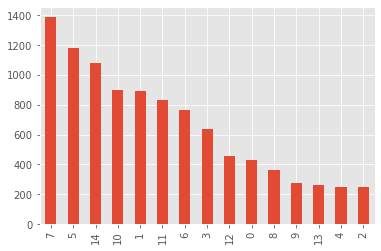

In [308]:
_df[FLAGS].value_counts().plot.bar()

In [309]:
# for ii in range(_nc):
#     _,ax = plt.subplots(figsize=(20,3))
#     _df1 = _df[_df[FLAGS]==ii].drop(FLAGS,axis=1)
#     _df1.boxplot(rot=90,ax=ax)
#     _t = ax.get_xticks()[::5]
#     _l = ax.get_xticklabels()[::5]
#     ax.set_xticks(_t)
#     ax.set_xticklabels(_l)

In [310]:
_nds = _df[FLAGS].to_xarray()

In [311]:
ds[FLAGS]=_nds

In [412]:
# from matplotlib.colors import LinearSegmentedColormap
# cm = LinearSegmentedColormap.from_list('', ucp.cc[:_nc], N=_nc)
# import cartopy.crs as ccrs
# _,ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()),figsize=(20,10))
# ds[FLAGS].plot(
#     x=XLONG,y=XLAT,levels=_nc+1,vmin=-.5,vmax = _nc-.5,ax=ax, transform=ccrs.PlateCarree(),cmap=cm,
#     cbar_kwargs={'ticks':range(_nc)}
# )
# ax.coastlines()
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='k', alpha=0.5, linestyle='--')
